# HW02 TingHui Cheng

## Problem 1 (Regression)

### (a)

In [200]:
import numpy as np             
import matplotlib.pyplot as plt   

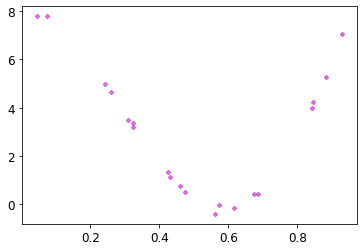

In [201]:
x =np.loadtxt('02HW1_Xtrain')
y =np.loadtxt('02HW1_Ytrain')
plt.rc('xtick', labelsize=12)   
plt.rc('ytick', labelsize=12)
plt.scatter(x, y,c = "m", s = 10,alpha = .5,marker = "D") 
plt.show()

In [202]:
firstorder = np.poly1d(np.polyfit(x, y, 1))
secondorder = np.poly1d(np.polyfit(x, y, 2))
thirdorder = np.poly1d(np.polyfit(x, y, 3))

print("Sum of squares error:")
SSE1 = sum(np.square(y - firstorder(x)))
print('1st order =', SSE1)
SSE2 = sum(np.square(y - secondorder(x)))
print('2nd order =', SSE2)
SSE3 = sum(np.square(y - thirdorder(x)))
print('3rd order =', SSE3)

Sum of squares error:
1st order = 130.84002186664137
2nd order = 14.355310485469394
3rd order = 1.1158736227491848


Residuals:


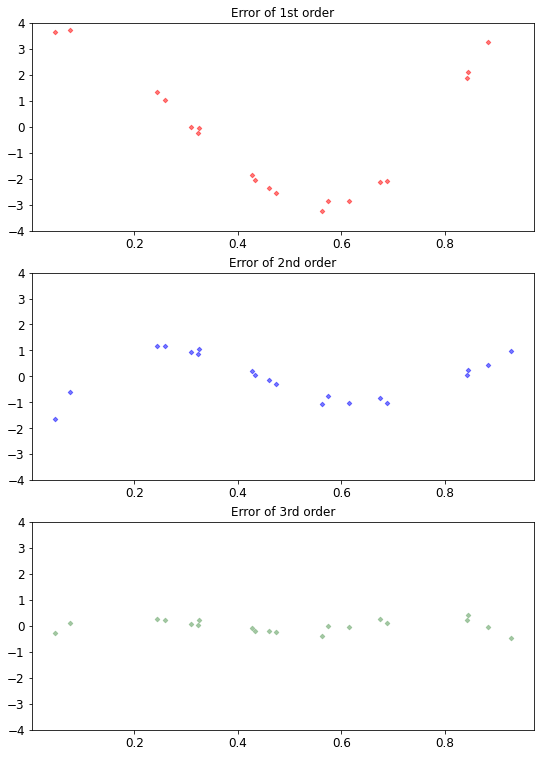

Sum of the residuals:
1st order = 5.1514348342607263e-14
2nd order = -1.6209256159527285e-13
3rd order = -5.978550987606468e-14


In [203]:
print('Residuals:')
plt.figure(figsize=(9,13))
err = y - firstorder(x)
plt.subplot(3,1,1)
plt.ylim(-4,4)
plt.scatter(x, err,c = "r", s = 10,alpha = .5,marker = "D") 
plt.title('Error of 1st order')
err2 = y - secondorder(x)
plt.subplot(3,1,2)
plt.ylim(-4,4)
plt.scatter(x, err2,c = "b", s = 10,alpha = .5,marker = "D") 
plt.title('Error of 2nd order')
err3 = y - thirdorder(x)
plt.subplot(3,1,3)
plt.ylim(-4,4)
plt.scatter(x, err3,c = "darkseagreen", s = 10,alpha = .8,marker = "D") 
plt.title('Error of 3rd order')
plt.show()

print("Sum of the residuals:")
SE1 = sum(err)
print('1st order =', SE1)
SE2 = sum(err2)
print('2nd order =', SE2)
SE3 = sum(err3)
print('3rd order =', SE3)

To sum up,<br>
由上面的圖可以觀察到，在first order跟second order時，residual是會隨著時間改變，非indepedence，<br>
而third order的圖中，residual的與x無關，呈現normal distribution，<br>
故third order在此data中，才有遵守least square assumption，此外，在SSE上，third order也有最低值，效果最好。

### (b)

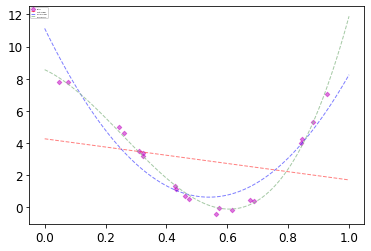

In [204]:
ar = np.linspace(0, 1, 100)
plt.scatter(x, y,c = "m", s = 10,alpha = .5,marker = "D", label='data') 
plt.plot(ar, firstorder(ar), c ='r',alpha = .5,linewidth=1,linestyle='--', label="1st order")
plt.plot(ar, secondorder(ar), c ='b',alpha = .5,linewidth=1,linestyle='--', label="2nd order")
plt.plot(ar, thirdorder(ar), c ='darkseagreen',alpha = .8,linewidth=1,linestyle='--', label="3rd order")
plt.legend()
plt.show()

## Problem 2 (Variance of linear regression model)
![title](2.png)

## Problem 3 (Residue analysis)

### 3(a)

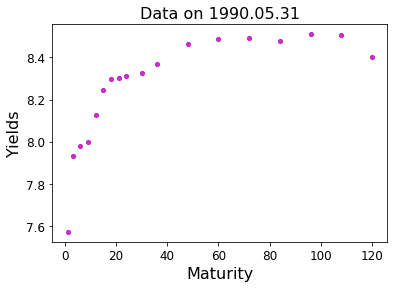

In [205]:
x3 = [1, 3, 6, 9, 12, 15, 18, 21, 24, 30, 36, 48, 60, 72, 84, 96, 108, 120]
y3 = [7.571, 7.931, 7.977, 7.996, 8.126, 8.247, 8.298, 8.304, 8.311, 8.327, 8.369, 8.462, 8.487, 8.492, 8.479, 8.510, 8.507, 8.404]

plt.scatter(x3, y3,c = "m", s = 17,alpha = .8)
plt.xlabel('Maturity', fontsize =16)
plt.ylabel('Yields', fontsize =16)
plt.title('Data on 1990.05.31', fontsize =16)
plt.show()

由圖中可以觀察出當maturity變大，yields有隨之升高的趨勢<br>

### 3(b)

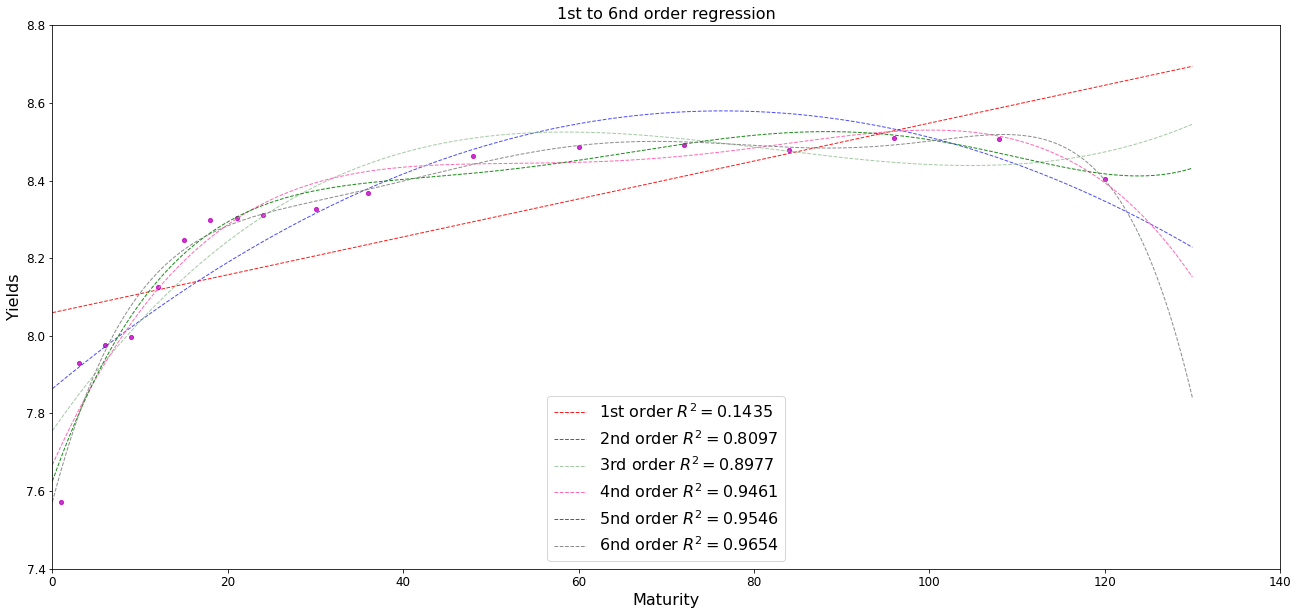

In [206]:
ar3 = np.linspace(0, 130, 10000)
label = ['1st order','2nd order','3rd order','4th order','5th order','6th order']
plt.figure(figsize=(22,10))
plt.scatter(x3, y3,c = "m", s = 17,alpha = .8)

first = np.poly1d(np.polyfit(x3, y3, 1))
SSE1 = sum(np.power(y3 - first(x3), 2))
SST1 = sum(np.power(first(x3) - np.mean(y3), 2))
rs1 = 1-SSE1/SST1
plt.plot(ar3, first(ar3), c ='r',alpha = .9,linewidth=1,linestyle='--', label="1st order $R^2 = %.4f$"%(rs1))

second = np.poly1d(np.polyfit(x3, y3, 2))
SSE2 = sum(np.power(y3 - second(x3), 2))
SST2 = sum(np.power(second(x3) - np.mean(y3), 2))
rs2 = 1-SSE2/SST2
plt.plot(ar3, second(ar3), c ='b',alpha = .7,linewidth=1,linestyle='--', label="2nd order $R^2 = %.4f$"%(rs2))

third = np.poly1d(np.polyfit(x3, y3, 3))
SSE3 = sum(np.power(y3 - third(x3), 2))
SST3 = sum(np.power(third(x3) - np.mean(y3), 2))
rs3 = 1-SSE3/SST3
plt.plot(ar3, third(ar3), c ='darkseagreen',alpha = .8,linewidth=1,linestyle='--', label="3rd order $R^2 = %.4f$"%(rs3))

fourth = np.poly1d(np.polyfit(x3, y3, 4))
SSE4 = sum(np.power(y3 - fourth(x3), 2))
SST4 = sum(np.power(fourth(x3) - np.mean(y3), 2))
rs4 = 1-SSE4/SST4
plt.plot(ar3, fourth(ar3), c ='hotpink',alpha = 1,linewidth=1,linestyle='--', label="4nd order $R^2 = %.4f$"%(rs4))

fifth = np.poly1d(np.polyfit(x3, y3, 5))
SSE5 = sum(np.power(y3 - fifth(x3), 2))
SST5 = sum(np.power(fifth(x3) - np.mean(y3), 2))
rs5 = 1-SSE5/SST5
plt.plot(ar3, fifth(ar3), c ='green',alpha = .9,linewidth=1,linestyle='--', label="5nd order $R^2 = %.4f$"%(rs5))

sixth = np.poly1d(np.polyfit(x3, y3, 6))
SSE6 = sum(np.power(y3 - sixth(x3), 2))
SST6 = sum(np.power(sixth(x3) - np.mean(y3), 2))
rs6 = 1-SSE6/SST6
plt.plot(ar3, sixth(ar3), c ='gray',alpha = .9,linewidth=1,linestyle='--', label="6nd order $R^2 = %.4f$"%(rs6))

plt.title('1st to 6nd order regression', fontsize = 16)
plt.xlabel('Maturity', fontsize = 16)
plt.ylabel('Yields', fontsize = 16)
plt.ylim(7.4,8.8)
plt.xlim(0,140)
plt.rc('xtick', labelsize=16)   
plt.rc('ytick', labelsize=16)
plt.legend(fontsize=16)
plt.show()

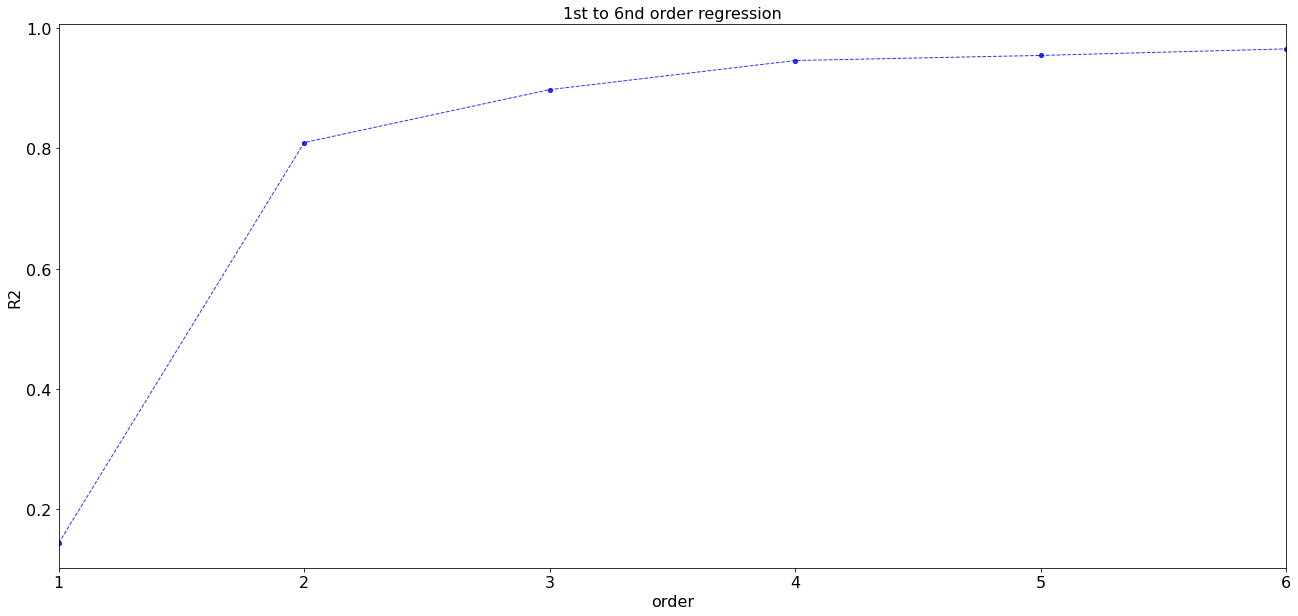

In [207]:
ar3 = np.linspace(0, 130, 10000)
label = ['1st order','2nd order','3rd order','4th order','5th order','6th order']
plt.figure(figsize=(22,10))

o = np.linspace(1, 6, 6)
r = np.array([rs1, rs2, rs3, rs4, rs5, rs6])
plt.scatter(o, r,c = "b", s = 17,alpha = .8)
plt.plot(o, r,c = "b",alpha = .8, linewidth=1,linestyle='--')

plt.title('1st to 6nd order regression', fontsize = 16)
plt.xlabel('order', fontsize = 16)
plt.ylabel('R2', fontsize = 16)

plt.rc('xtick', labelsize=16)   
plt.rc('ytick', labelsize=16)
plt.xlim(1,6)
plt.show()

$SST = SSE + SSR,\ R^2 = \frac {SSR}{SST}$  <br>
$R^2$(相關係數)越接近1，相關性越強，由圖中可發現，當order越高，R^2越接近1，因此可6th order效果最好 <br>

### 3(c) 

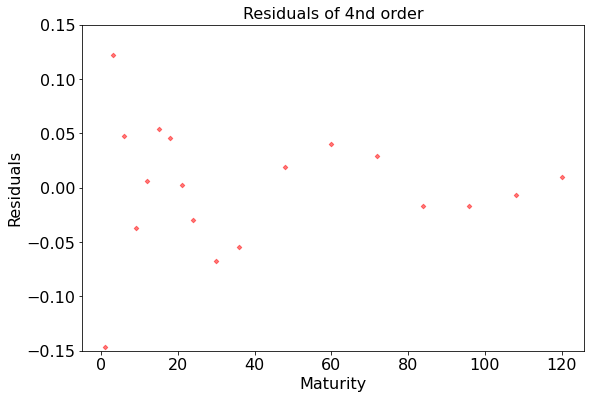

In [208]:
plt.figure(figsize=(9,6))
err3 = y3 - fourth(x3)
plt.ylim(-0.15,0.15)
plt.scatter(x3, err3,c = "r", s = 10,alpha = .5,marker = "D") 
plt.xlabel('Maturity', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.title('Residuals of 4nd order',fontsize = 16)   
plt.show()

由上圖可知，residuals皆十分接近0，代表4th order model 十分fit這些訓練資料，此外，還能發現隨著maturity提高，residual越趨近於0。<br>

### 3(d) 

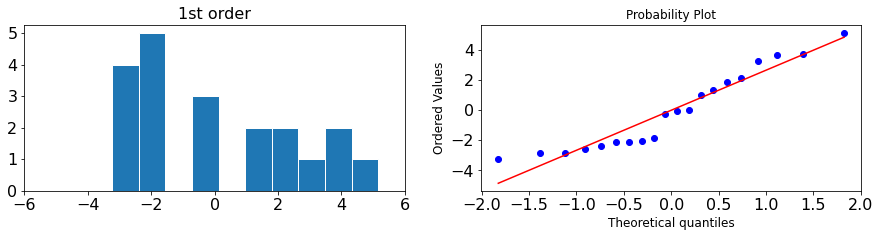

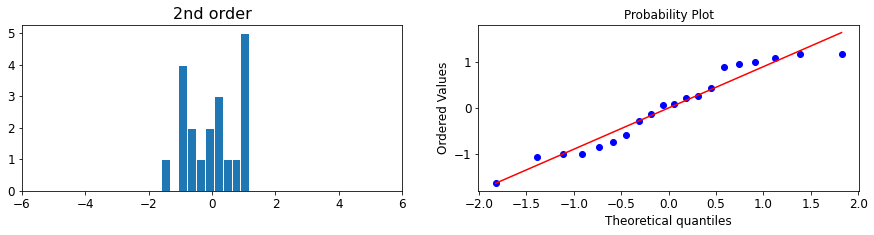

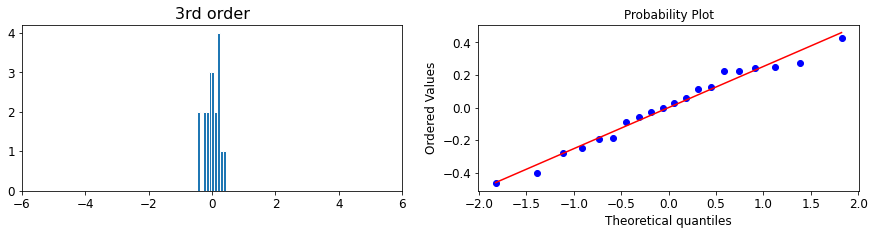

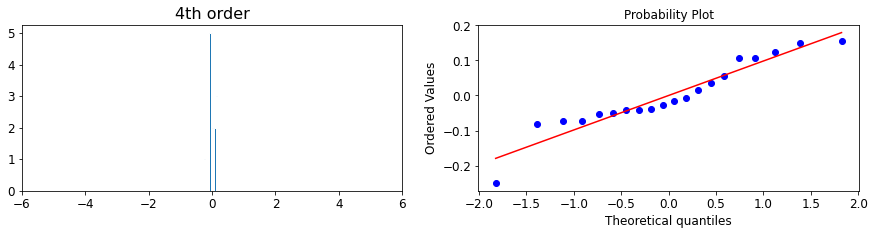

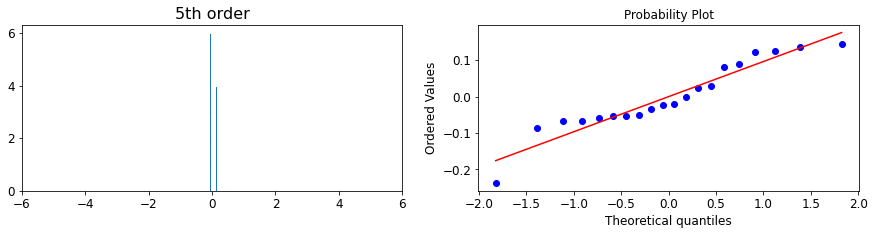

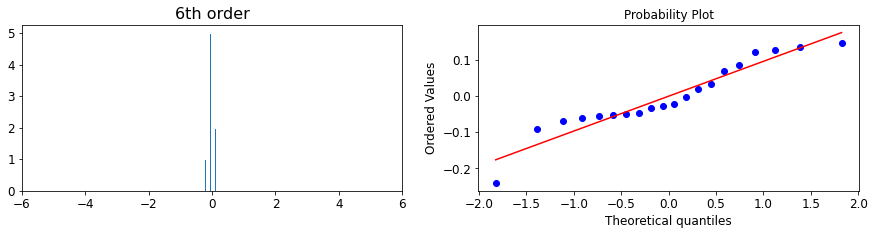

In [209]:
import pylab 
import scipy.stats as stats

label = ['1st order','2nd order','3rd order','4th order','5th order','6th order']
for i in range(1,7):
    mymodel = np.poly1d(np.polyfit(x, y, i))
    eps = y - mymodel(x)
    plt.figure(figsize=(15,25))
    plt.subplot(7, 2, 1)
    plt.title(label[i-1], fontsize =16)
    plt.xlim(-6,6)
    plt.hist(eps,10,edgecolor='w')
    
    plt.subplot(7, 2, 2)
    plt.rc('xtick', labelsize=12)   
    plt.rc('ytick', labelsize=12)
    plt.rc('axes', titlesize=12)
    stats.probplot(eps, dist="norm", plot=pylab)
    pylab.show()

從histogram以及Q-Q plot中可以看出，當order升高時，residual分布會越接近0，而越接近0就表示實際點與預測點越靠近，<br>
且在1st跟2nd order時，residual分布偏右，表示大多數的實際數值是大於model的預測值的。<br>
而在3rd與4th order時，residual則是接近常態分佈。<br>
在5th與6th order時，有較多residual接近0，代表實際值與model預測值相近。